# PRIMER PARCIAL

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# 1. PARTE 1

In [10]:
#Redireccionar nuestra localización a donde està el archivo de irir
path = r"C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

In [11]:
df = pd.read_csv(path)
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [12]:
import seaborn as sns

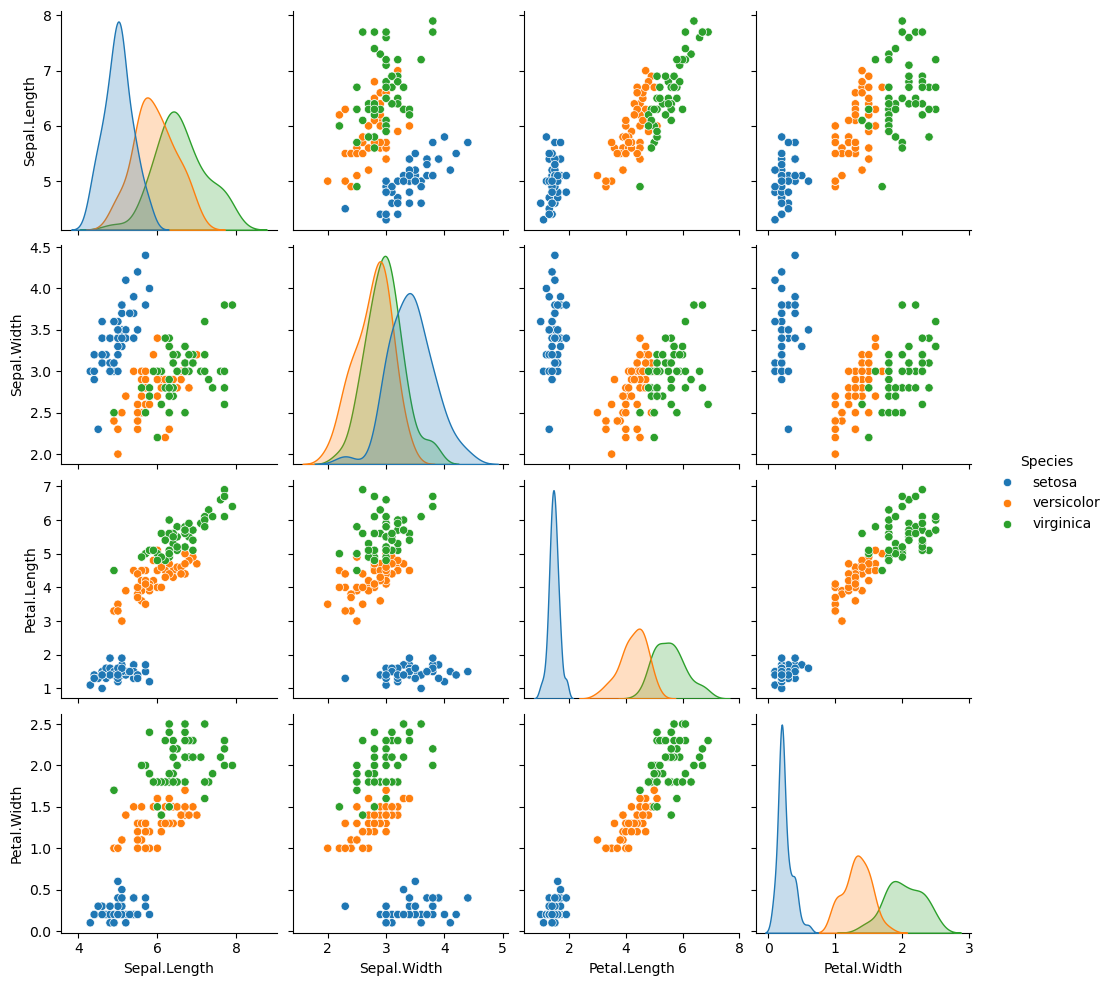

In [13]:
X = df.iloc[:, :4] #filtrar solo las 4 columnas numericas
sns.pairplot(df, hue="Species") #mostrar la correlacion entre las cuatro variables pero solo de 2 en 2, agregando hue agregamos color a
#cada grupo de datos, ya que al especificar que sea por especies le estamos diciendo que no son un solo conjunto sino que todos los
# que correspondan a la cantidad de grupos en Species

In [14]:
X

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [15]:
#Calcular los vectores y valores propios a partir de la matriz de covarianza (la diferencia entre la de 
#correlación es que no es estrictamente necesario que tengan la misma dimensión).
#Porcentaje de aporte de las variables y cuyantas ocupamos para representar el 85% de datos.

In [16]:
df['Species'].unique() #nos dice cuales elementos definen Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
#Primero Normalizamos los datos de nuestros array
np.mean(X, axis=0), np.std(X, axis=0)

(Sepal.Length    5.843333
 Sepal.Width     3.057333
 Petal.Length    3.758000
 Petal.Width     1.199333
 dtype: float64,
 Sepal.Length    0.825301
 Sepal.Width     0.434411
 Petal.Length    1.759404
 Petal.Width     0.759693
 dtype: float64)

In [18]:
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)
X_std

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]

In [19]:
X_std.iloc[:, 0] #Index location siempre que trabajemos con un dataframe, o sea agarrate todos los indices 

0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: Sepal.Length, Length: 150, dtype: float64

In [20]:
X_std.describe() #Para corroborar la normalización

Sepal.Length   Sepal.Width  Petal.Length   Petal.Width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -8.052818e-16 -2.842171e-16 -4.736952e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.433947e+00 -1.567576e+00 -1.447076e+00
25%   -9.006812e-01 -5.923730e-01 -1.226552e+00 -1.183812e+00
50%   -5.250608e-02 -1.319795e-01  3.364776e-01  1.325097e-01
75%    6.745011e-01  5.586108e-01  7.627583e-01  7.906707e-01
max    2.492019e+00  3.090775e+00  1.785832e+00  1.712096e+00

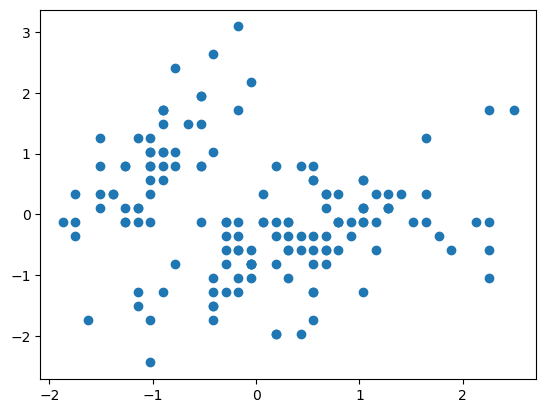

In [21]:
plt.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1])

# Calculo de la Matriz covarianza

In [23]:
X_mean = np.mean(X_std, axis=0)
X_mean

Sepal.Length   -4.736952e-16
Sepal.Width    -8.052818e-16
Petal.Length   -2.842171e-16
Petal.Width    -4.736952e-16
dtype: float64

In [24]:
cov_matrix = (X_std - X_mean).T.dot((X_std - X_mean))/(X_std.shape[0]-1) #primer metodo para sacar matriz cov
cov_matrix

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.006711    -0.118359      0.877604     0.823431
Sepal.Width      -0.118359     1.006711     -0.431316    -0.368583
Petal.Length      0.877604    -0.431316      1.006711     0.969328
Petal.Width       0.823431    -0.368583      0.969328     1.006711

In [25]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

# Calculo de valores y vectores propios con la matriz de covarianza

In [27]:
#Manera corta de calcularlos (la del rpofe)
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [28]:
eig_vals, eig_vectors = np.linalg.eig(np.cov(X_std.T))
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [29]:
#Manera rápida del profe para sacar el % de cada vector
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624878,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449483,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462436,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [30]:
# Ordenamos de mayor a menor
eigen_pairs.sort(reverse=True)

# Calculamos los porcentajes
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [31]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842]

In [32]:
print('El porcentaje de información acumulado es:')
cum_var_exp

El porcentaje de información acumulado es:


array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [33]:
#Sacar el porcentaje de cada uno de los vectores 
total_sum = np.sum(eig_vals)

val_porc_eig_val_1 = eig_vals[0]/total_sum * 100 #Los corchetes indican que estamos trabajando ahuevo con arreglos, el 0 es la posición 
val_porc_eig_val_2 = eig_vals[1]/total_sum * 100 #1 del array, nuestro array en este caso es eig_vals y [0] le estamos diciendo
val_porc_eig_val_3 = eig_vals[2]/total_sum * 100 #que tome el primer dato de ese array, y así susesivamente
val_porc_eig_val_4 = eig_vals[3]/total_sum * 100
val_porc_eig_val_1, val_porc_eig_val_2, val_porc_eig_val_3, val_porc_eig_val_4
#En este caso podemos ver que sólo los 2 primeros datos del array (valor propio 1 y 2) expresan el 94% de nuestros datos.


(72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842)

In [34]:
#Metodo rápido del profe, lo hago para ver que me diera lo mismo
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [35]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[72.96244541329983, 22.850761786701792, 3.6689218892828848, 0.5178709107154842]

# Creando la matriz que representa la Tlineal

In [37]:
#Al transformar estamos proyectando en un espacio reducido, por lo que perse ya no estamos trabajando con los mismos datos
# o sea nos da los datos tomando en consideración 3 datos en este caso. Cuando reducimos de dimensión tendremos la información organizada. 
#Es ver la proyección con las sombras.

In [38]:
eigen_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624878,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449483,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462436,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [39]:
eigen_pairs[0][1], eigen_pairs[1][1]

(array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))

In [40]:
T_matrix = np.stack((eigen_pairs[0][1], eigen_pairs[1][1]), axis=1)
T_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [41]:
T_matrix.shape

(4, 2)

In [42]:
# Aquí calculamos los vectores proyectados sin usar for
Y = X_std.dot(T_matrix)
Y

0         1
0   -2.264703 -0.480027
1   -2.080961  0.674134
2   -2.364229  0.341908
3   -2.299384  0.597395
4   -2.389842 -0.646835
..        ...       ...
145  1.870503 -0.386966
146  1.564580  0.896687
147  1.521170 -0.269069
148  1.372788 -1.011254
149  0.960656  0.024332

[150 rows x 2 columns]

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)
data_proyectada = pca.fit_transform(X_std)

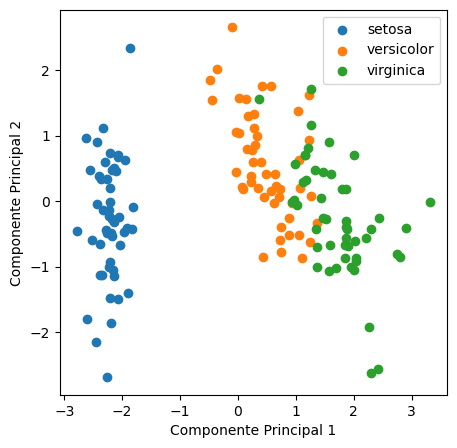

In [45]:
y = df['Species']
plt.figure(figsize=(5, 5))

for name in ('setosa', 'versicolor', 'virginica'):
    plt.scatter(data_proyectada[y==name,0], 
                -data_proyectada[y==name,1], 
                label=name)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.legend()
plt.show()

PLOT 3D

Varianza explicada por cada componente: [0.72962445 0.22850762 0.03668922]
Varianza total explicada: 99.48%


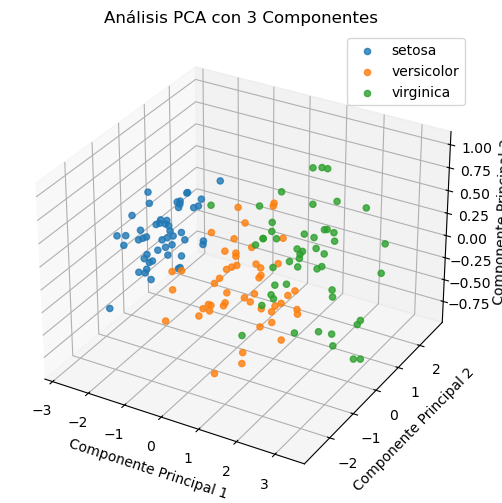

In [47]:
# Cargar datos
df = pd.read_csv(path)
X = df.iloc[:, :4]  # Filtrar las 4 columnas numéricas
y = df['Species']  # Extraer etiquetas

# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
data_proyectada = pca.fit_transform(X_std)

# Crear dataframe con los datos proyectados
df_proyectado = pd.DataFrame(data_proyectada, columns=['CP1', 'CP2', 'CP3'])
df_proyectado['Species'] = y

# Porcentaje de varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza total explicada: {np.sum(explained_variance) * 100:.2f}%")

# Gráfico 3D de los datos proyectados
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Dibujar scatterplot con las especies
for name in ('setosa', 'versicolor', 'virginica'):
    subset = df_proyectado[df_proyectado['Species'] == name]
    ax.scatter(subset['CP1'], subset['CP2'], subset['CP3'], label=name, alpha=0.8)

# Etiquetas y título
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
ax.set_title("Análisis PCA con 3 Componentes")
ax.legend()
plt.show()


# 2. PARTE 2: Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Redireccionar nuestra localización a donde està el archivo Brain Tumor
path2 = r"C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"

In [50]:
df = pd.DataFrame({'column': ['3.14', '2.71', 'Image1']})
# Filtramos las filas que contienen valores no numéricos
df['column'] = pd.to_numeric(df['column'], errors='coerce')  # Con 'coerce', se convierten los no numéricos en NaN


In [51]:
df = pd.read_csv(path2)
df.head()

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

In [52]:
Z = df.iloc[:, :4]

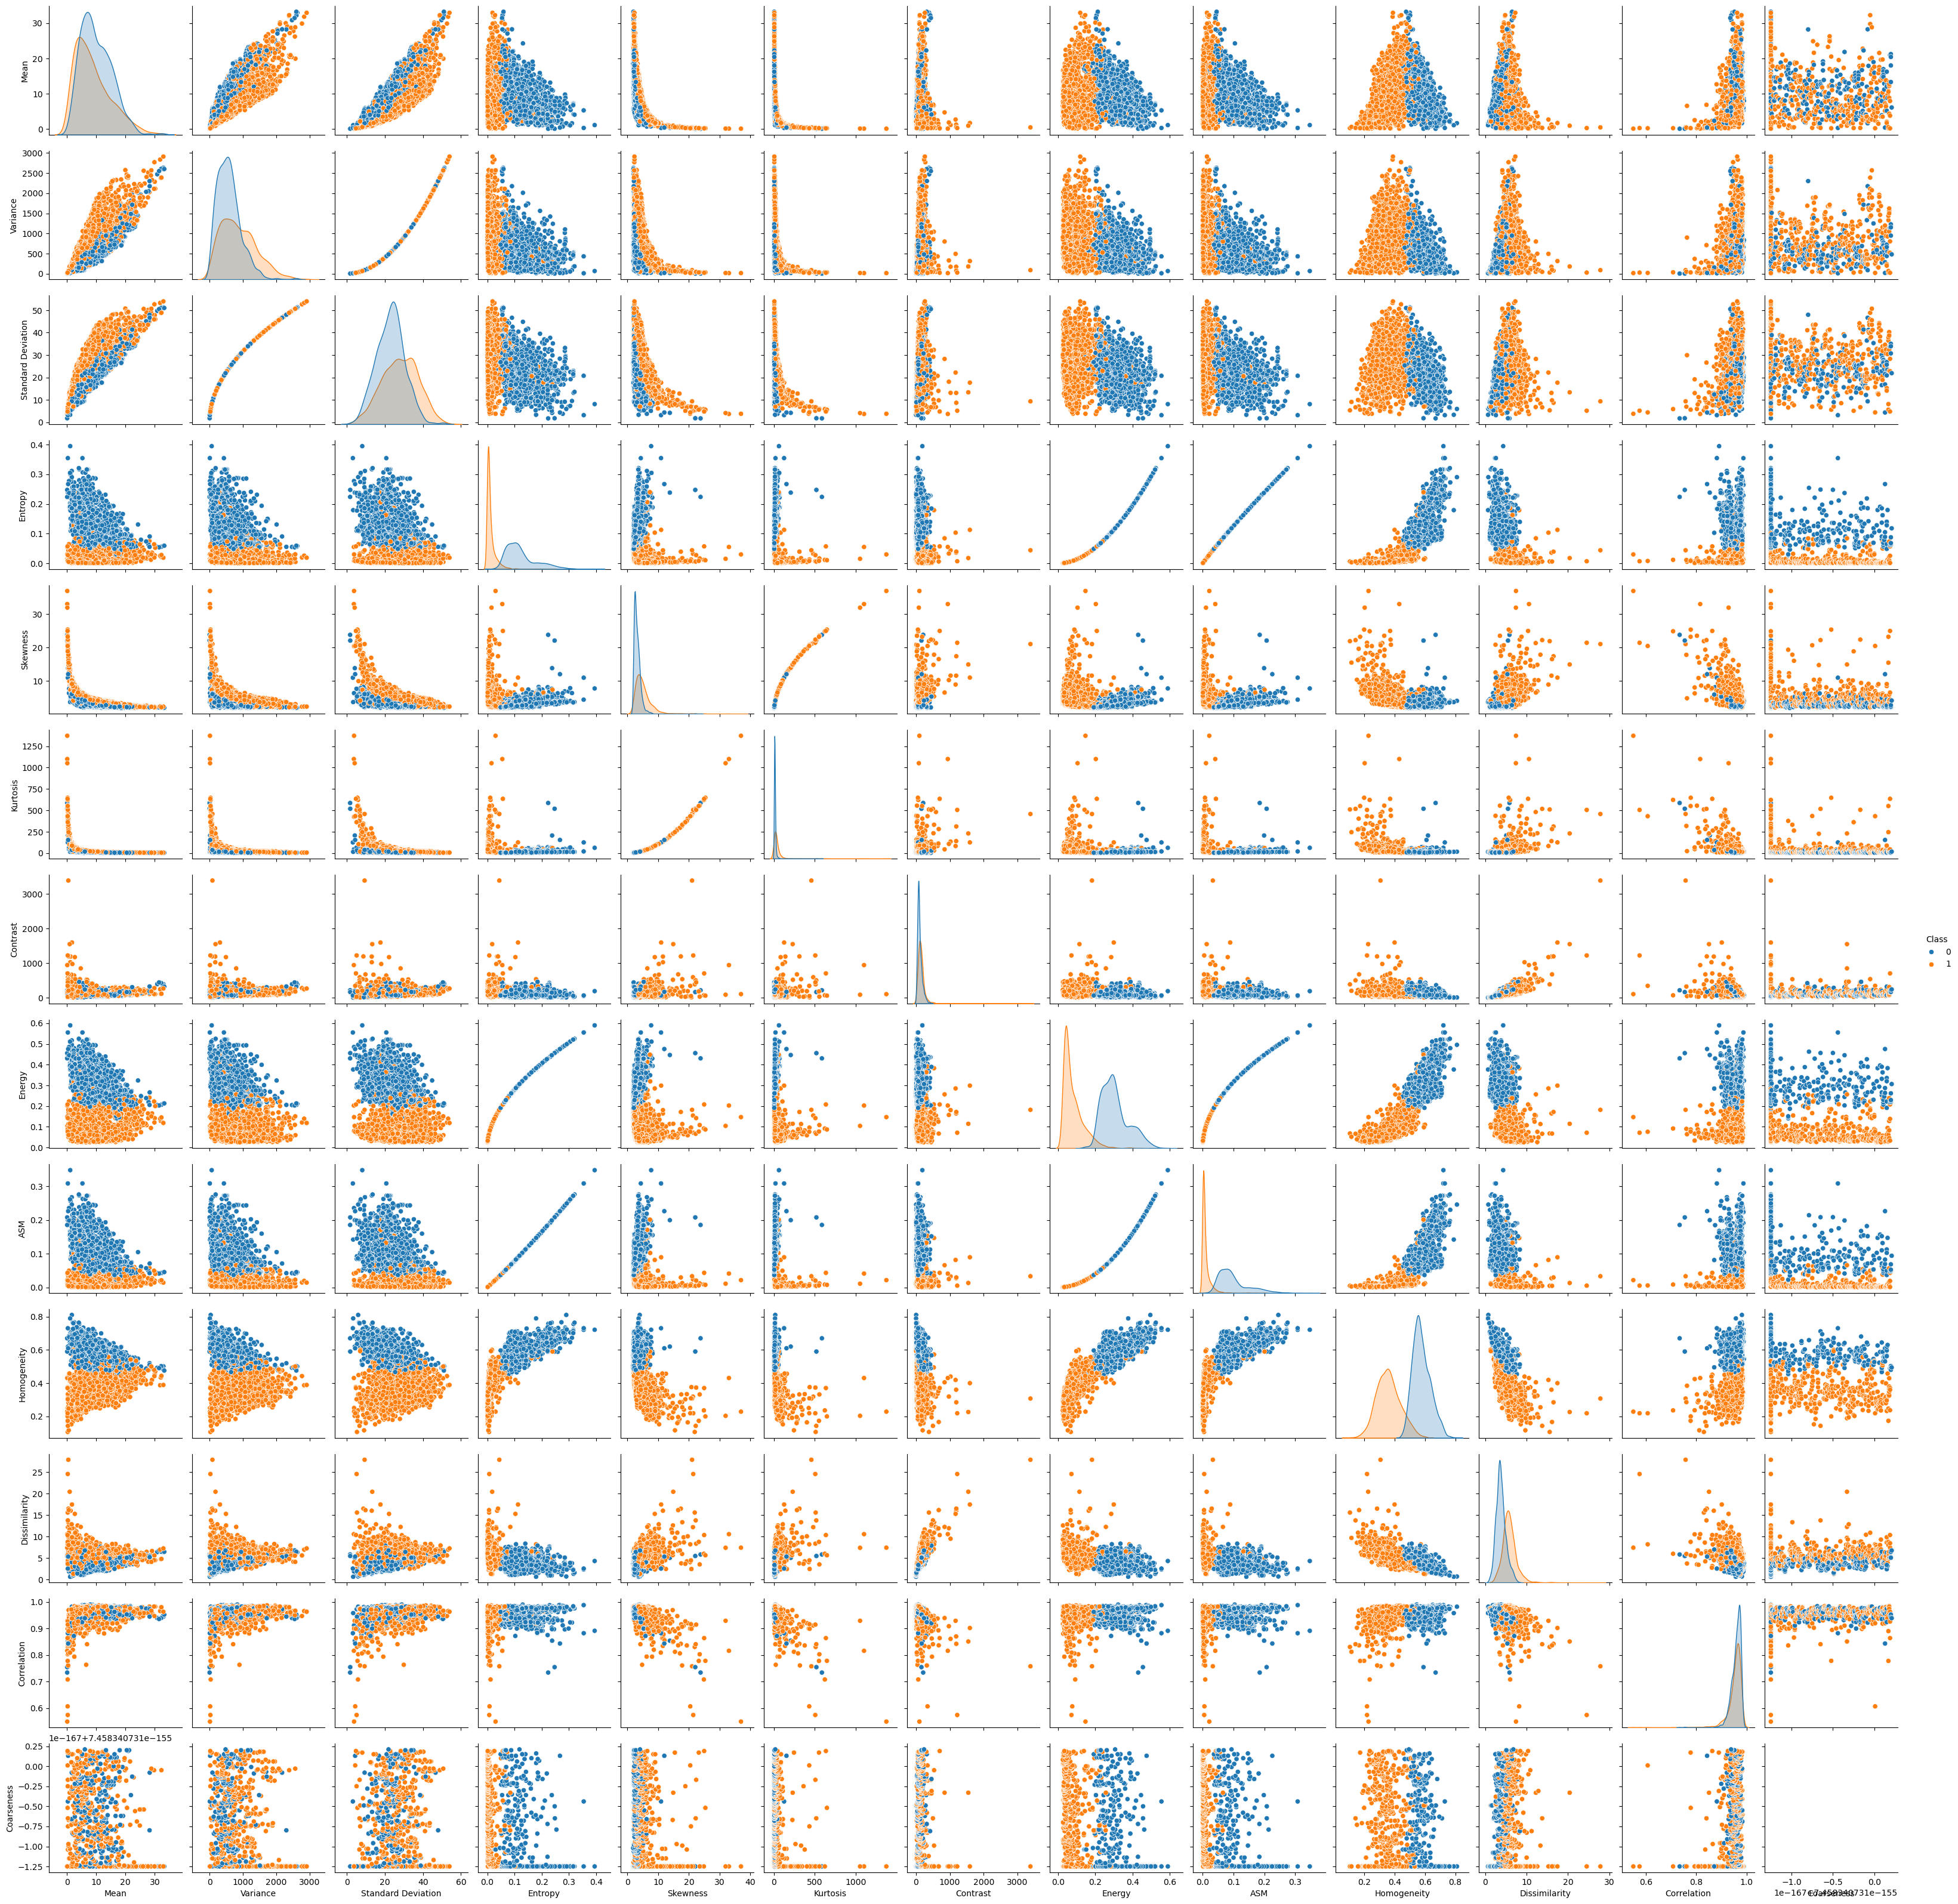

In [53]:
sns.pairplot(df, hue="Class")

1.1 Determinar el porcentaje de aporte de cada vector propio

In [74]:
#Primero Normalizamos los datos de nuestros array CON OTRO METODO
# Seleccionar solo columnas numéricas y renombrar la variable
data_numerica = df.select_dtypes(include=[np.number])

# Manejo de valores faltantes (opcional, dependiendo del dataset)
data_numerica = data_numerica.dropna()

#Ahora sí normalizar
scaler = StandardScaler()
X_std2 = scaler.fit_transform(data_numerica)

In [78]:
cov_matrix2 = (Z_std - Z_mean).T.dot((Z_std - Z_mean))/(Z_std.shape[0]-1) #primer metodo para sacar matriz cov
cov_matrix2

NameError: name 'Z_std' is not defined

In [80]:
#Manera corta de calcularlos (la del rpofe)
eig_vals2, eig_vectors2 = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [82]:
eig_vals2, eig_vectors2 = np.linalg.eig(np.cov(Z_std.T))
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

NameError: name 'Z_std' is not defined

In [ ]:
#Manera rápida del profe para sacar el % de cada vector
eigen_pairs2 = [(np.abs(eig_vals2[i]), eig_vectors2[:,i]) for i in range(len(eig_vals))]
eigen_pairs2

In [ ]:
# Ordenamos de mayor a menor
eigen_pairs2.sort(reverse=True)

# Calculamos los porcentajes
total_sum2 = sum(eig_vals2)
var_exp2 = [(i/total_sum2)*100 for i in sorted(eig_vals2, reverse=True)]
cum_var_exp2 = np.cumsum(var_exp2)

In [ ]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp2

In [ ]:
print('El porcentaje de información acumulado es:')
cum_var_exp2

1.2 Metodo 2

1.3 Metodo 3

In [ ]:
# En el anterior a este no jaló porque a que hue=df['Class'] no está siendo interpretado correctamente en la función sns.pairplot
#En lugar de pasar la columna hue de esta manera, necesitamos unirla correctamente al dataframe proyectado.